# Import Libraries
Import necessary libraries for data loading, cleaning, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
Load the dataset and display its basic structure.

In [3]:
df = pd.read_csv("../data/corporateCreditRatingWithFinancialRatios.csv")
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                  

# Check for Missing Values
Check for missing or null values in the dataset.

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Rating Agency                    0
Corporation                      0
Rating                           0
Rating Date                      0
CIK                              0
Binary Rating                    0
SIC Code                         0
Sector                           0
Ticker                           0
Current Ratio                    0
Long-term Debt / Capital         0
Debt/Equity Ratio                0
Gross Margin                     0
Operating Margin                 0
EBIT Margin                      0
EBITDA Margin                    0
Pre-Tax Profit Margin            0
Net Profit Margin                0
Asset Turnover                   0
ROE - Return On Equity           0
Return On Tangible Equity        0
ROA - Return On Assets           0
ROI - Return On Investment       0
Operating Cash Flow Per Share    0
Free Cash Flow Per Share         0
dtype: int64


# Verify Duplicate Rows
Check for duplicate rows to ensure data integrity.

In [6]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


Duplicate rows: 0


# Verify Date Range
Are any dates incorrectly formatted or out of range (2010 - 2016)?

In [12]:
print(f"Oldest Rating Date: {df['Rating Date'].min()}")
print(f"Most Recent Rating Date: {df['Rating Date'].max()}")

Oldest Rating Date: 2010-04-06 00:00:00
Most Recent Rating Date: 2016-12-27 00:00:00


# Convert Rating Date to Datetime
Convert the 'Rating Date' column to a datetime object.

In [8]:
df['Rating Date'] = pd.to_datetime(df['Rating Date'], errors='coerce')
print("\nConverted 'Rating Date' to datetime. Summary:")
print(df['Rating Date'].describe(datetime_is_numeric=True))


Converted 'Rating Date' to datetime. Summary:
count                             7805
mean     2014-06-06 12:14:28.981421824
min                2010-04-06 00:00:00
25%                2013-07-23 00:00:00
50%                2014-07-23 00:00:00
75%                2015-07-02 00:00:00
max                2016-12-27 00:00:00
Name: Rating Date, dtype: object


# Standardize Text Columns
Standardize text formatting for categorical columns.

In [9]:
text_cols = ['Rating Agency', 'Corporation', 'Sector']
df[text_cols] = df[text_cols].apply(lambda x: x.str.strip().str.title())
print("\nStandardized text columns. Sample:")
print(df[text_cols].head())


Standardized text columns. Sample:
                        Rating Agency                     Corporation Sector
0  Standard & Poor'S Ratings Services       American States Water Co.  Utils
1  Standard & Poor'S Ratings Services  Automatic Data Processing Inc.  Buseq
2  Standard & Poor'S Ratings Services                      Avnet Inc.  Shops
3  Standard & Poor'S Ratings Services    California Water Service Co.  Utils
4  Standard & Poor'S Ratings Services            Cardinal Health Inc.  Shops


# Visualize Outliers
Plot boxplots for key financial ratios to identify outliers.

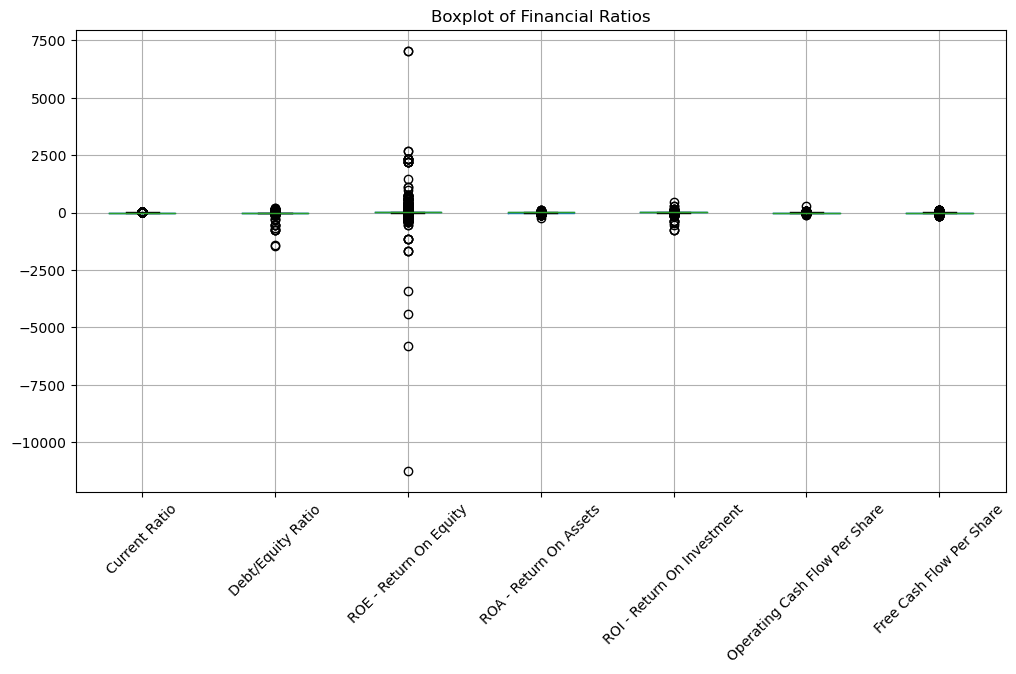

       Current Ratio  Debt/Equity Ratio  ROE - Return On Equity  \
count    7805.000000        7805.000000             7805.000000   
mean        1.926313           0.177349               15.950507   
std         1.921651          34.456334              230.592526   
min         0.174900       -1473.098000           -11258.210000   
25%         1.077300           0.419700                6.022800   
50%         1.496800           0.752800               12.500000   
75%         2.161000           1.211600               20.515700   
max        34.076800         194.375000             7038.461000   

       ROA - Return On Assets  ROI - Return On Investment  \
count             7805.000000                 7805.000000   
mean                 4.575705                    7.076084   
std                  9.229899                   24.382027   
min               -226.442500                 -745.454500   
25%                  2.391900                    3.692600   
50%                  4.767500 

In [10]:
ratio_cols = [
    "Current Ratio", "Debt/Equity Ratio", "ROE - Return On Equity",
    "ROA - Return On Assets", "ROI - Return On Investment",
    "Operating Cash Flow Per Share", "Free Cash Flow Per Share"
]

plt.figure(figsize=(12, 6))
df[ratio_cols].boxplot(rot=45)
plt.title("Boxplot of Financial Ratios")
plt.show()

print(df[ratio_cols].describe())

# Handle Outliers
Cap extreme outliers to the 1st and 99th percentiles.

In [11]:
for col in ratio_cols:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
print("\nCapped extreme values. Sample after capping:")
print(df[ratio_cols].describe())


Capped extreme values. Sample after capping:
       Current Ratio  Debt/Equity Ratio  ROE - Return On Equity  \
count    7805.000000        7805.000000             7805.000000   
mean        1.852727           1.113450               13.104024   
std         1.295572           3.592178               39.667223   
min         0.481508         -14.539800             -171.447100   
25%         1.077300           0.419700                6.022800   
50%         1.496800           0.752800               12.500000   
75%         2.161000           1.211600               20.515700   
max         8.132600          26.151300              233.333400   

       ROA - Return On Assets  ROI - Return On Investment  \
count             7805.000000                 7805.000000   
mean                 4.798165                    7.730621   
std                  6.156724                   10.248318   
min                -23.714600                  -36.576200   
25%                  2.391900                

# Save Cleaned Data
Save the cleaned dataset for further analysis.

In [13]:
df.to_csv("../data/cleaned_credit_ratings.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_credit_ratings.csv'.")


Cleaned dataset saved as 'cleaned_credit_ratings.csv'.
